In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/converted_test_2020_06_16_09-31-01.csv',parse_dates=['Flight_Date','Request_Date'])

In [3]:
data

,Unnamed: 0,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,price_in_eur,Request_Weekday,Request_AM_PM
0,0,2019-07-28 11:00:00,2019-07-29 18:00:00,31.0,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€,73.43,Sunday,AM
1,1,2019-07-28 11:00:00,2019-07-29 22:00:00,35.0,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€,180.53,Sunday,AM
2,2,2019-07-28 11:00:00,2019-07-30 06:00:00,43.0,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€,61.19,Sunday,AM
3,3,2019-07-28 23:00:00,2019-07-30 06:00:00,31.0,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€,73.43,Sunday,PM
4,4,2019-07-28 11:00:00,2019-07-30 10:00:00,47.0,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€,180.53,Sunday,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,5119,2019-07-31 23:00:00,2019-09-10 10:00:00,971.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€,35.69,Wednesday,PM
5120,5120,2019-08-01 11:00:00,2019-09-10 10:00:00,959.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€,35.69,Thursday,AM
5121,5121,2019-08-01 23:00:00,2019-09-10 10:00:00,947.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€,46.83,Thursday,PM
5122,5122,2019-08-02 11:00:00,2019-09-10 10:00:00,935.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€,46.83,Friday,AM


In [4]:
data.dtypes

Unnamed: 0                   int64
Request_Date        datetime64[ns]
Flight_Date         datetime64[ns]
Duration_Time              float64
Departure_hour               int64
flight_unique_id            object
route_abb                   object
flight_number               object
Price                      float64
Currency                    object
price_in_eur               float64
Request_Weekday             object
Request_AM_PM               object
dtype: object

In [5]:
data.Request_Date.min()

Timestamp('2019-07-28 11:00:00')

In [6]:
data.Request_Date.max()

Timestamp('2019-08-02 23:00:00')

# The data shows the total number and unique number of price changes per route from 28.07.19-02.08.19. It shows the min, max, mean prices for each route and the max difference of price changes per route. 

# Route FRA-STN: 81 different flights, 929 price changes, max. price difference: 298.10€ 
# Route STN-FRA: 79 different flights, 899 price changes, max. price difference: 231.34€
# Route STN-SXF: 141 different flights, 1588 price changes, max. price difference: 199.14€
# Route SXF-STN: 154 different flights, 1708 price changes, max. price difference: 253.14€

In [227]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data.groupby(['route_abb', 'flight_number', 'flight_unique_id', 'Request_Date']).size()

route_abb  flight_number  flight_unique_id    Request_Date       
FRA-STN    FR 1546        2019-07-31 FR 1546  2019-07-28 11:00:00    1
                                              2019-07-28 23:00:00    1
                          2019-08-01 FR 1546  2019-07-28 11:00:00    1
                                              2019-07-28 23:00:00    1
                                              2019-07-29 11:00:00    1
                                                                    ..
SXF-STN    FR 8545        2019-09-09 FR 8545  2019-07-31 23:00:00    1
                                              2019-08-01 11:00:00    1
                                              2019-08-01 23:00:00    1
                                              2019-08-02 11:00:00    1
                                              2019-08-02 23:00:00    1
Length: 5124, dtype: int64

In [195]:
# data show which flights belong to which route 
data.groupby('route_abb').flight_number.unique()

route_abb
FRA-STN                    [FR 1546, FR 1686]
STN-FRA                    [FR 1547, FR 1687]
STN-SXF    [FR 147, FR 8542, FR 145, FR 8544]
SXF-STN    [FR 146, FR 8545, FR 144, FR 8543]
Name: flight_number, dtype: object

In [196]:
# number of flights per route 
data.groupby('route_abb').flight_unique_id.nunique()

route_abb
FRA-STN     81
STN-FRA     79
STN-SXF    141
SXF-STN    154
Name: flight_unique_id, dtype: int64

In [254]:
##number of price changes aggregated over each route 
price_route = data.groupby('route_abb').price_in_eur.agg(['count', 'nunique', 'min', 'max', 'mean'])
price_route = pd.DataFrame(price_route) 
#price_route

In [255]:
# calculates the difference between the min and max price for each route
max_price_change_route = price_route['max'] - price_route['min']
price_route['max_price_change'] = max_price_change_route
price_route

,count,nunique,min,max,mean,max_price_change
route_abb,,,,,,
FRA-STN,929,43,12.990000,311.090000,87.825662,298.100000
STN-FRA,899,163,11.713473,243.054591,67.697934,231.341118
STN-SXF,1588,181,11.713473,210.854971,67.095134,199.141499
SXF-STN,1708,39,12.990000,266.130000,100.096470,253.140000


In [256]:
%matplotlib inline

In [257]:
sns.set(rc={'figure.figsize':(11, 4)})

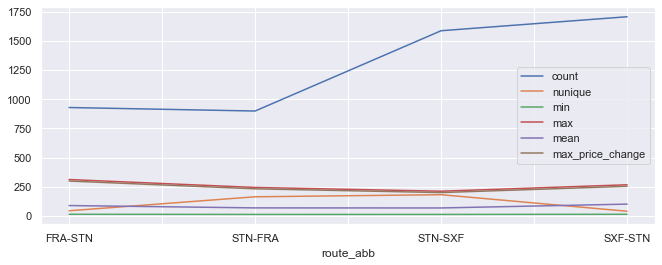

In [258]:
# plot shows number of price changes and values (y-axis) aggregated over each route (x-axis)
price_route.plot()

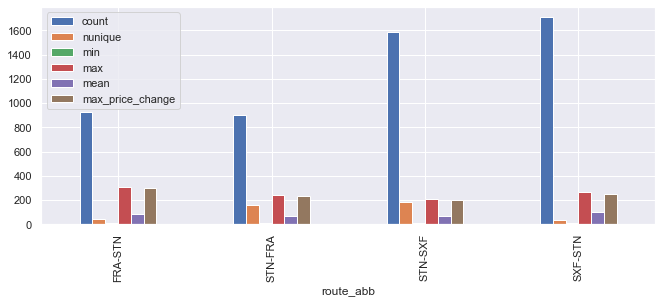

In [259]:
# plot shows number of price changes and values (y-axis) aggregated over each route (x-axis)
price_route.plot(kind = 'bar')

# The data shows the total number and unique number of price changes per flight with same flight number from 28.07.19-02.08.19. It shows the min, max, mean prices for each flight and the max difference of price changes per flight. 

In [260]:
##number of price changes aggregated over each flight number 
price_flight_number = data.groupby('flight_number').price_in_eur.agg(['count', 'nunique', 'min', 'max', 'mean'])
price_flight_number = pd.DataFrame(price_flight_number) 

In [261]:
# calculates the difference between the min and max price for each flight
max_price_difference_flight = price_flight_number['max'] - price_flight_number['min']
price_flight_number['max_price_change'] = max_price_difference_flight
price_flight_number

,count,nunique,min,max,mean,max_price_change
flight_number,,,,,,
FR 144,482,25,17.990000,266.130000,83.544232,248.140000
FR 145,447,106,11.713473,207.529888,69.378107,195.816415
FR 146,397,21,42.830000,264.130000,124.386474,221.300000
FR 147,382,103,11.713473,210.479801,70.835918,198.766328
FR 1546,468,35,12.990000,311.090000,100.213761,298.100000
FR 1547,455,110,11.713473,241.720685,73.453787,230.007212
FR 1686,461,35,12.990000,254.990000,75.249458,242.000000
FR 1687,444,135,11.713473,243.054591,61.799480,231.341118
FR 8542,388,118,11.713473,210.854971,61.253138,199.141499


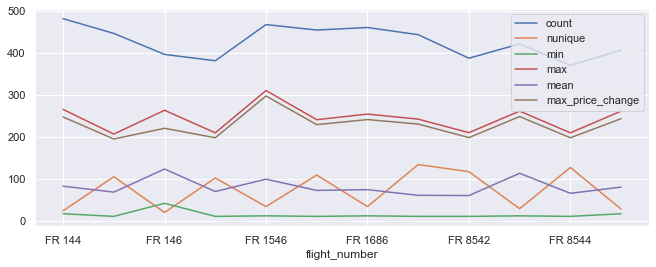

In [262]:
# plot shows number of price changes and values (y-axis) aggregated over each flight with same flight number (x-axis)
price_flight_number.plot()

# The data shows the total number and unique number of price changes per unique flight from 28.07.19-02.08.19. It shows the min, max, mean prices for each flight and the max difference of price changes per unique flight. 

In [266]:
##number of price changes aggregated over each unique flight id
price_flight_id = data.groupby('flight_unique_id').price_in_eur.agg(['count', 'min', 'max', 'mean'])
price_flight_id = pd.DataFrame(price_flight_id) 

In [267]:
# calculates the difference between the min and max price for each flight id
max_price_difference_flight_id = price_flight_id['max'] - price_flight_id['min']
price_flight_id['max_price_change'] = max_price_difference_flight_id
price_flight_id.reset_index(inplace=True)
price_flight_id

,flight_unique_id,count,min,max,mean,max_price_change
0,2019-07-29 FR 146,1,73.430000,73.430000,73.430000,0.000000
1,2019-07-29 FR 8545,1,180.530000,180.530000,180.530000,0.000000
2,2019-07-30 FR 144,2,61.190000,73.430000,67.310000,12.240000
3,2019-07-30 FR 146,3,152.990000,152.990000,152.990000,0.000000
4,2019-07-30 FR 8543,2,180.530000,180.530000,180.530000,0.000000
5,2019-07-30 FR 8545,3,50.990000,50.990000,50.990000,0.000000
6,2019-07-31 FR 144,4,42.830000,50.990000,46.910000,8.160000
7,2019-07-31 FR 146,4,61.190000,180.530000,143.810000,119.340000
8,2019-07-31 FR 1546,2,254.990000,254.990000,254.990000,0.000000
9,2019-07-31 FR 8545,5,42.830000,50.990000,47.726000,8.160000


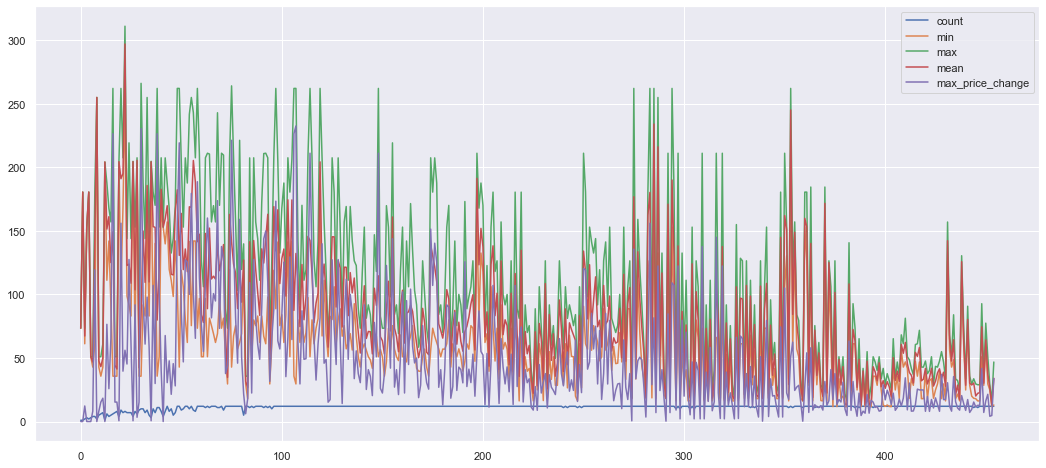

In [268]:
# plot shows number of price changes and values (y-axis) aggregated over each flight with same flight number (x-axis)
sns.set(rc={'figure.figsize':(18, 8)})
price_flight_id.plot()

# Plots with pricing for specific flights

In [409]:
#format the request date to YYYY-mm-dd 
calc_request_dates = data.Request_Date.apply(lambda x: x.strftime('%Y-%m-%d'))
calc_request_dates

0       2019-07-28
1       2019-07-28
2       2019-07-28
3       2019-07-28
4       2019-07-28
           ...    
5119    2019-07-31
5120    2019-08-01
5121    2019-08-01
5122    2019-08-02
5123    2019-08-02
Name: Request_Date, Length: 5124, dtype: object

In [410]:
#filter for specific day with boolean indexing
filter_day = (calc_request_dates == '2019-07-28')
filter_day

0        True
1        True
2        True
3        True
4        True
        ...  
5119    False
5120    False
5121    False
5122    False
5123    False
Name: Request_Date, Length: 5124, dtype: bool

In [411]:
#only select the true values
true_date_values = data[filter_day]
true_date_values

,Unnamed: 0,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,price_in_eur,Request_Weekday,Request_AM_PM
0,0,2019-07-28 11:00:00,2019-07-29 18:00:00,31.0,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€,73.430000,Sunday,AM
1,1,2019-07-28 11:00:00,2019-07-29 22:00:00,35.0,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€,180.530000,Sunday,AM
2,2,2019-07-28 11:00:00,2019-07-30 06:00:00,43.0,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€,61.190000,Sunday,AM
3,3,2019-07-28 23:00:00,2019-07-30 06:00:00,31.0,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€,73.430000,Sunday,PM
4,4,2019-07-28 11:00:00,2019-07-30 10:00:00,47.0,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€,180.530000,Sunday,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089,5089,2019-07-28 23:00:00,2019-09-10 06:00:00,1039.0,6,2019-09-10 FR 8542,STN-SXF,FR 8542,12.99,£,11.713473,Sunday,PM
5100,5100,2019-07-28 11:00:00,2019-09-10 07:00:00,1052.0,7,2019-09-10 FR 145,STN-SXF,FR 145,27.53,£,24.824627,Sunday,AM
5101,5101,2019-07-28 23:00:00,2019-09-10 07:00:00,1040.0,7,2019-09-10 FR 145,STN-SXF,FR 145,27.53,£,24.824627,Sunday,PM
5112,5112,2019-07-28 11:00:00,2019-09-10 10:00:00,1055.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,12.99,€,12.990000,Sunday,AM


In [404]:
##number of price changes aggregated over each route on a specific day
price_change_day = true_date_values.groupby(true_date_values.flight_number == 'FR 147').price_in_eur.value_counts()
price_change_day = pd.DataFrame(price_change_day) 
price_change_day

price_in_eur
flight_number price_in_eur              
False         61.190000               43
              126.470000              42
              50.990000               39
              106.070000              33
              16.222123               31
              75.470000               29
              28.503685               27
              117.720851              25
              35.690000               22
              62.210000               22
              204.178724              22
              180.530000              20
              42.830000               19
              67.133799               19
              73.430000               19
              18.025583               18
              88.730000               18
              152.990000              18
              82.769797               17
              167.388140              16
              11.713473               15
              24.824627               15
              29.570000               15
              57.016388               15
              68.973328               14
              91.790000               14
              98.405795               14
              111.170000              14
              56.096623               12
              17.990000               11
              39.540861               11
              46.898977               11
              33.102508               10
              33.650000               10
              52.880000               10
              80.010503               10
              96.566266               10
              41.810000                9
              132.590000               9
              17.376337                8
              33.607477                8
              66.090000                7
              67.920000                7
              79.860000                6
              22.804752                5
              47.818742                5
              141.634731               5
              157.070000               5
              211.130000               5
              262.130000               5
              139.795202               4
              18.611707                3
              19.946268                3
              20.288925                3
              51.317454                3
              187.670000               3
              26.483810                2
              35.654404                2
              37.566072                2
              40.640971                2
              45.890000                2
              59.100000                2
              254.990000               2
              311.090000               2
              12.990000                1
              21.371001                1
              31.055581                1
              31.632688                1
              40.790000                1
              43.039573                1
              43.340000                1
              55.990000                1
              62.075093                1
True          80.010503                9
              56.096623                8
              16.222123                7
              67.133799                7
              24.824627                6
              204.178724               5
              11.713473                4
              46.898977                4
              117.720851               4
              18.611707                2
              139.795202               2
              167.388140               2
              20.288925                1
              22.804752                1
              26.483810                1
              28.133976                1
              28.503685                1
              33.607477                1
              35.654404                1

In [417]:
price_change_day_agg = true_date_values.groupby(true_date_values.flight_number == 'FR 147').price_in_eur.agg(['count', 'min', 'max', 'mean'])

In [418]:
# calculates the difference between the min and max price for each route on a specific day
max_price_change_day = price_change_day_agg['max'] - price_change_day_agg['min']
price_change_day_agg['max_price_change'] = max_price_change_day
price_change_day_agg

,count,min,max,mean,max_price_change
flight_number,,,,,
False,838,11.713473,311.090000,77.778679,299.376527
True,67,11.713473,204.178724,66.785085,192.465251


In [420]:
price_flight_1546 = data.groupby(data.flight_unique_id == '2019-08-04 FR 1546').price_in_eur.unique()
#price_flight_1546 = pd.DataFrame(price_flight_1546) 
price_flight_1546

flight_unique_id
False    [73.43, 180.53, 61.19, 152.99, 50.99, 42.83, 2...
True                                      [187.67, 157.07]
Name: price_in_eur, dtype: object

In [250]:
# calculates the difference between the min and max price for each route
max_price_difference_1546 = price_flight_1546['max'] - price_flight_1546['min']
price_flight_1546['max_diff'] = max_price_difference_1546
price_flight_1546

,count,min,max,mean,max_diff
flight_unique_id,,,,,
False,5112,11.713473,311.09,81.753616,299.376527
True,12,157.070000,187.67,169.820000,30.600000


In [424]:
##the price changes 5 times for the flight 2019-09-10 FR 8543
df = data.groupby(data.flight_unique_id=='2019-09-10 FR 8543')['price_in_eur'].unique()
df

flight_unique_id
False    [73.43, 180.53, 61.19, 152.99, 50.99, 42.83, 2...
True                   [12.99, 29.57, 35.69, 46.83, 39.69]
Name: price_in_eur, dtype: object

In [425]:
##the values of the price changes for flight 2019-09-10 FR 8543, look at the True values
##the min = 12.99 and max = 46.83
test = data.groupby(data.flight_unique_id =='2019-09-10 FR 8543').price_in_eur.value_counts()
test

flight_unique_id  price_in_eur
False             50.990000       205
                  106.070000      195
                  88.730000       180
                  73.430000       169
                  75.470000       168
                  126.470000      168
                  61.190000       148
                  152.990000      141
                  62.210000       114
                  91.790000        97
                  42.830000        93
                  35.690000        90
                  180.530000       86
                  111.170000       72
                  132.590000       69
                  29.570000        63
                  211.130000       59
                  157.070000       55
                  262.130000       48
                  41.810000        45
                  18.291850        44
                  18.315438        43
                  28.962030        41
                  18.220885        40
                  16.270696        39
                  2

flight_unique_id
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: price_in_eur, dtype: object

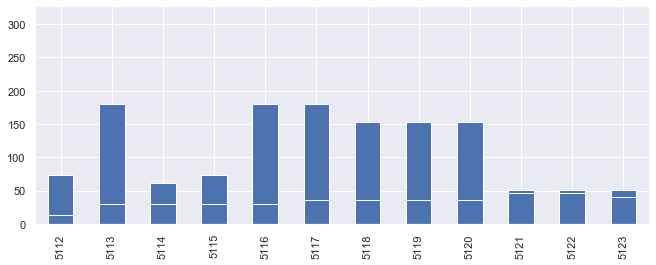

In [16]:
data.groupby(data.flight_unique_id=='2019-09-10 FR 8543').price_in_eur.plot(kind='bar')

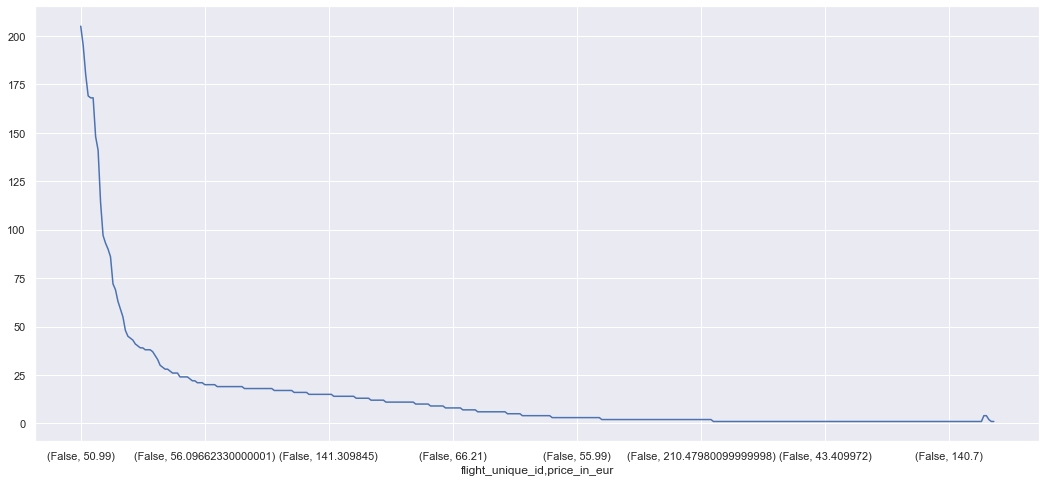

In [426]:
##data.price_in_eur.value_counts().sort_index().plot()
test.plot()

In [22]:
#data['route_abb_num'] = data.route_abb.map({'FRA-STN':0, 'STN-FRA':1, 'STN-SXF':2, 'SXF-STN':3})

flight_number
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: price_in_eur, dtype: object

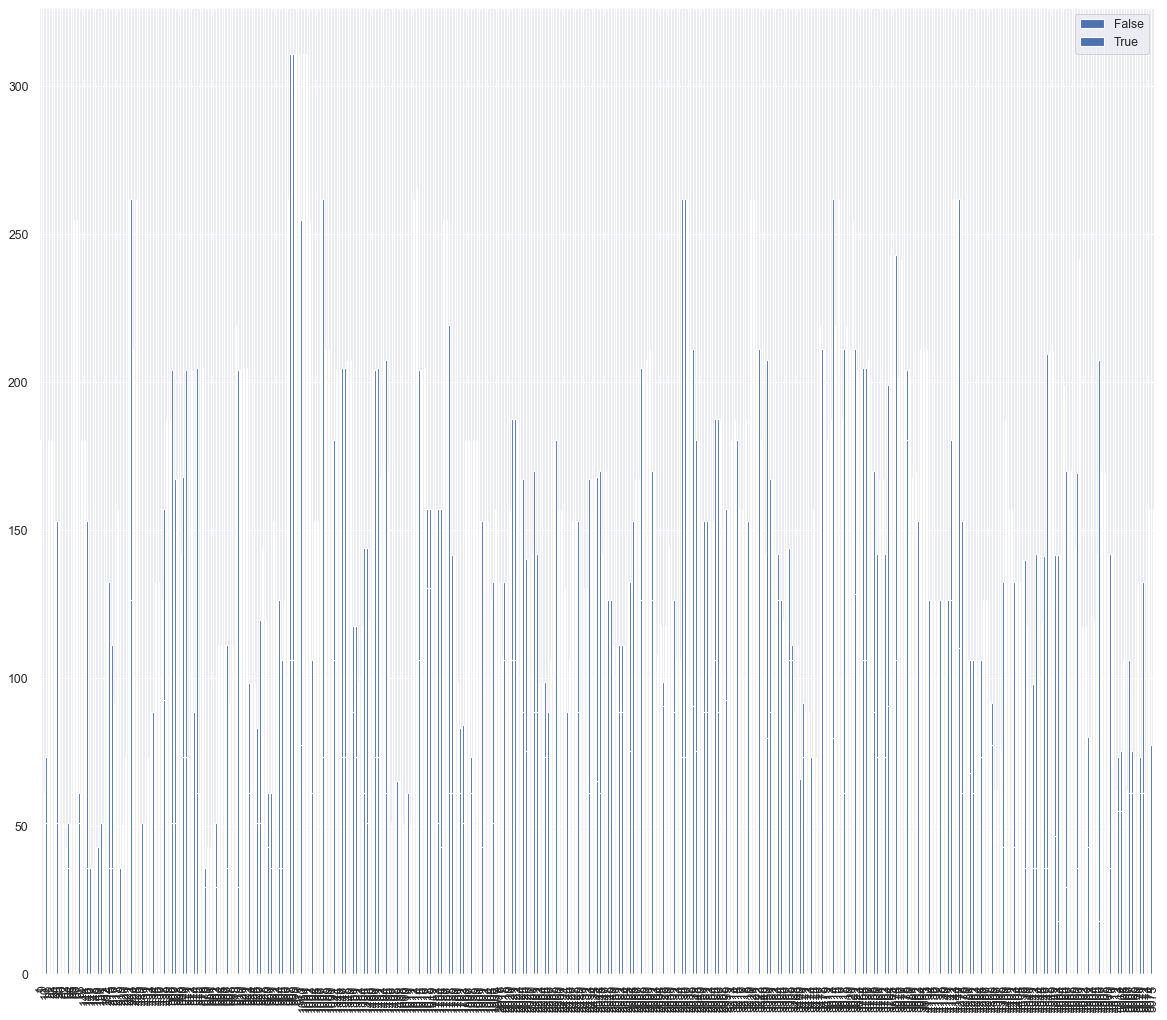

In [427]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
data.groupby(data.flight_number=='FR 8545').price_in_eur.plot(kind='bar', legend=True)

# Plot for pricing at AM and PM

In [428]:
data['Request_AM_PM_num'] = data.Request_AM_PM.map({'AM':0, 'PM':1})

In [429]:
data.loc[0:4, ['Request_AM_PM', 'Request_AM_PM_num']]

,Request_AM_PM,Request_AM_PM_num
0,AM,0
1,AM,0
2,AM,0
3,PM,1
4,AM,0
